# Checkpoint 1

**Due: Friday, 16 October, 2020 at 5:00pm BST**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

## Libraries and Constants
Custom imports and constants should be added to a new cell.

In [1]:
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib inline
import numpy as np
from scipy import integrate, optimize
import time

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

# Gravitational constant
gg     = 6.67408e-11 # m^3 s^-1 kg^-2
# Lunar mass
mass   = 7.342e22 # kg
# Lunar radius
radius = 1738000 # m
# 1 day in seconds
day    = 3600*24 # seconds

### Initial positions and velocities at t=0
rs = [1842280, 0] # m
vs = [0, 1634]    # m/s

In [2]:
from scipy import interpolate
import matplotlib.image as mpimg

## Equations of motion for the unperturbed case:

$
\Large
\begin{align}
\frac{d^{2} x}{dt^2} = - \frac{G M x}{(x^2 + y^2)^{3/2}}
\end{align}
$

$
\Large
\begin{align}
\frac{d^{2} y}{dt^2} = - \frac{G M y}{(x^2 + y^2)^{3/2}}
\end{align}
$

# Task 1 (30p)

In the cell below, write a function that computes the trajectory from t = 0 to tmax, where tmax is given as an argument to the function. The function should return two arrays for the x and y positions of the trajectory. Each array should have N points (equally spaced in time), where N is given as an argument to the function. You may create additional cells for defining functions.

In [3]:
# This function takes as parameters time t and an array storing the values of x,y,vx and vy at time t,
# and then uses the ODEs above to calculate the new accelerations and return the velocities and accelerations.

def funct1(t, values):  
    
    x = values[0]
    y = values[1]
    vx = values[2]
    vy = values[3]
    
    numer = -gg * mass  
    denom = (x**2 + y**2)**(3/2)
    
    dvx_dt = (numer/denom)*x
    dvy_dt = (numer/denom)*y
    
    return vx,vy,dvx_dt,dvy_dt


In [4]:
def task1(N, tmax):
    """
    Compute orbital trajectory.
    
    Parameters
    ----------
    N : int
        Number of points in trajectory arrays
    tmax : float
        End time of integration in units of seconds.
        
    Returns
    -------
    x : array
        x positions of the trajectory
    y : array
        y positions of the trajectory
    """
    
    ts = np.linspace(0,tmax,N)
    values = [rs[0], rs[1], vs[0], vs[1]]   # initial values of x,y,vx,vy
    
    sol = integrate.odeint(funct1, values, ts, tfirst=True)  # solver of the IVP using the function defined above
    
    x_pos = sol[:,0]   # x positions
    y_pos = sol[:,1]   # y positions
    
    return x_pos,y_pos

## Testing task 1

The cell below will run your function with inputs of tmax = 1 day (in seconds) and some number of points. The assert statements below will test that the returned arrays are the correct size.

In [5]:
t_max = day
n_points = int(t_max / 100)

x_pos, y_pos = task1(n_points, t_max)

assert x_pos.size == n_points
assert y_pos.size == n_points

# Task 1 continued

In the cell below, create an animation of the spacecraft's trajectory for t = 0 to 24 hours that includes a circle representing the Moon. Each frame of the animation should only show the last few points to avoid overlapping a previous orbit. A successful animation will be worth the full 30 points. Alternatively, create a static plot showing the Moon and the spacecraft's trajectory. This will be worth a maximum of 25 points.

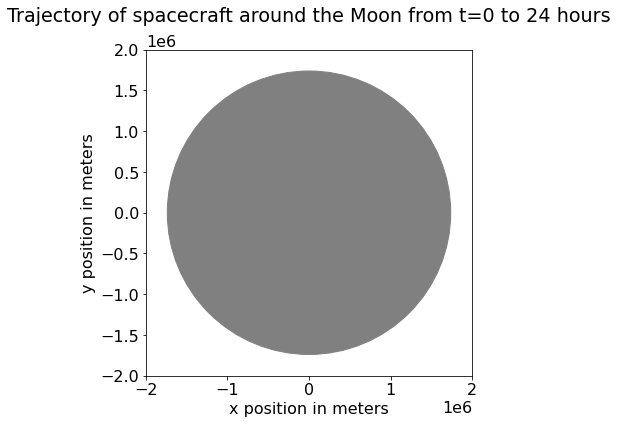

In [6]:
# prepares the axis for the animation
def prep():
    fig, ax = plt.subplots()
    line, = ax.plot([], [])
    rad = 2*10**6
    ax.set_xlim(-rad,rad)
    ax.set_ylim(-rad,rad)
    ax.set_ylabel('y position in meters')
    ax.set_xlabel('x position in meters')
    ax.set_aspect('equal')
    ax.set_title('Trajectory of spacecraft around the Moon from t=0 to 24 hours\n')

    circle = plt.Circle((0,0),radius, color='grey')  # the Moon
    ax.add_artist(circle)
    
    return fig, ax, line,

# initialization function
def init():
    line.set_data([], [])
    return (line,)

# animation function. This will be called in a sequence to generate frames.
def animate(i):
    i = 3*i    # "speed up" the animation so as to fit all 12 orbits in 300 frames
    start= max(0, i-30)    
    line.set_data(x_pos[start:i], y_pos[start:i])  # 'disappearing' trajectory effect
    return (line,)

fig, ax, line, = prep()
# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=300, interval=40)
# HTML(anim.to_jshtml())

# Task 2 (15p)

Determine the orbital period T. Your solution must be calculated numerically, i.e., not simply using the analytical expression. The obtained value must be within +/-1 s of the correct value.

In the cell below, write a function that returns the orbital period in units of seconds.

In [7]:
# This function uses scipy interpolation (interp1d) to return an interpolation function of the y positions over time
# Then, bretnq root finding method is used to obtain an accurate root of that function (i.e. when y is 0 again)
# while ensuring that the correct bracketing interval is used. 
# It finally returns the obtained value of the orbital period T.

def task2():
    
    # recreation of the identical times array, since it could not be returned from task1
    t_max = day
    n_points = int(t_max / 100)
    ts = np.linspace(0,t_max,n_points)  
    
    y_t = interpolate.interp1d(ts, y_pos)
    period = optimize.brentq(y_t, 5000,8000)
    
    return period


## Testing task 2

The cell below will run your function and compare with the analytic answer. They should agree to within 1 second.

In [8]:
T_calc = task2()
t1 = time.time()
print (f"Calculated orbital period: {T_calc} seconds.")
t2 = time.time()

mu = gg * mass
T_analytic = 2 * np.pi * np.sqrt((rs[0]**3 * mu**2) / (2*mu - rs[0]*vs[1]**2)**3)

print (f"Difference with correct answer: {T_calc - T_analytic} seconds.")
print (f"Solution calculated in {t2-t1} seconds.")

assert abs(T_calc - T_analytic) <= 1

print ("Hooray!")

Calculated orbital period: 7138.408323289099 seconds.
Difference with correct answer: 0.008898500809664256 seconds.
Solution calculated in 0.00016379356384277344 seconds.
Hooray!


# Task 3 (20p)

Now add a correction that makes the gravitational field non-spherical. The correction rotates with the Moon (one full rotation every T$_{Moon}$ = 27.3 days). How long does it take until the spacecraft hits the Moon? The time must be accurate to +/-1 s. Assume the Moon’s surface is a sphere. The equations of motion now become:

$
\Large
\begin{align}
\frac{d^{2} x}{dt^2} = - \frac{G M x}{(x^2 + y^2)^{3/2}}
- \frac{q\ G M x^\prime}{(x^{^\prime2} + y^{^\prime2})^{3/2}}
\end{align}
$

$
\Large
\begin{align}
\frac{d^{2} y}{dt^2} = - \frac{G M y}{(x^2 + y^2)^{3/2}}
- \frac{q\ G M y^\prime}{(x^{^\prime2} + y^{^\prime2})^{3/2}}
\end{align}
$

$
\Large
\begin{align}
x^\prime = x + 0.8\ R \cos \left( \frac{2 \pi t}{T_{Moon}} \right)
\end{align}
$

$
\Large
\begin{align}
y^\prime = y + 0.8\ R \sin \left( \frac{2 \pi t}{T_{Moon}} \right)
\end{align}
$

where q = 0.00025.

## Task 3 objectives:
1. Compute the time at which the spacecraft hits the Moon.
2. Make a plot of the height of the spacecraft above the Moon's surface as a function of time. Don't forget to label axes and include units.

# Task 3 part 1

In the cell below, create a function that returns the impact time accurate to within 1 second.

In [9]:
q = 0.00025  # q constant as stated above
T_moon = 27.3 * day  # full rotation of the Moon in seconds

In [10]:
# This function takes as parameters time t, an array storing the values of x,y,vx and vy at time t, and the value of q.
# It then uses the modified ODEs above, including the correction, to calculate the new accelerations, 
# and return the velocities and accelerations.

def funct2(t, values, q):  
    
    x = values[0]
    y = values[1]
    vx = values[2]
    vy = values[3]
    
    x_prtb = x + 0.8 * radius * np.cos(2*np.pi*t / T_moon) 
    y_prtb = y + 0.8 * radius * np.sin(2*np.pi*t / T_moon)  
    
    numer = -gg * mass  
    denom = (x**2 + y**2)**(3/2)
    prtb_numer = -q * gg * mass  
    prtb_denom = (x_prtb**2 + y_prtb**2)**(3/2)
    
    dvx_dt = (numer/denom)*x + (prtb_numer/prtb_denom)*x_prtb
    dvy_dt = (numer/denom)*y + (prtb_numer/prtb_denom)*y_prtb
    
    return vx,vy,dvx_dt,dvy_dt

In [11]:
# This function runs the simulation for 10 days, with a small timestep for accurate results.
# It then uses the x and y positions at each time to calculate the radial position of the satellite at each time
# and loops to find when that position becomes smaller or equal to the radius of the Moon, which indicates that the 
# satellite has hit the Moon's surface. It finally returns the corresponding time of the crash.

def task3():
    
    # timestep corresponds to 1 second (to obtain an answer accurate to within 1s)
    ts = np.arange(0,10*day,1) 
    values = [rs[0], rs[1], vs[0], vs[1]]    # initial values of x,y,vx,vy
    
    sol2 = integrate.odeint(funct2, values, ts, tfirst=True, args=(q,)) # solver of the IVP using the funct2 defined above
    
    x_pos2 = sol2[:,0]
    y_pos2 = sol2[:,1]
    
    for i in range(0,len(x_pos2)):
        
        # distance of the satellite from the origin (radial coordinate)
        sat_radius = np.sqrt( (x_pos2[i])**2 + (y_pos2[i])**2) 
        
        if (sat_radius <= radius):   # if the satellite 'hits' the Moon
            crash_time = ts[i]
            break
  
    return (crash_time)


## Testing task 3 part 1

The cell below will run your function and print your answer. This will be tested against the correct answer (not given).

In [12]:
t1 = time.time()
t_impact = task3()
t2 = time.time()

print (f"Time to impact: {t_impact:.2f} seconds ({t_impact / day:.2f} days).")
print (f"Solution calculated in {t2-t1} seconds.")

Time to impact: 627060.00 seconds (7.26 days).
Solution calculated in 2.4937922954559326 seconds.


## Task 3 part 2

In the cell below, plot of the height of the spacecraft above the Moon's surface as a function of time. Don't forget to label axes and include units.

In [13]:
# This function re-runs the simulation for 8 days (since the crash time was around 7.26 days)
# It returns the x and y positions and the array of time values.

def task3b():
    
    ts = np.linspace(0,8*day,int(8*day/100))
    values = [rs[0], rs[1], vs[0], vs[1]]   # initial values of x,y,vx,vy
    
    sol2 = integrate.odeint(funct2, values, ts, tfirst=True, args=(q,))  # solver of the IVP using the funct2 defined above
    
    x_pos2 = sol2[:,0]
    y_pos2 = sol2[:,1]
    
    for i in range(0,len(x_pos2)):
        
        # distance of the satellite from the origin (radial coordinate)
        sat_radius = np.sqrt( (x_pos2[i])**2 + (y_pos2[i])**2)
        
        if (sat_radius <= radius):     # if the satellite 'hits' the Moon
            crash_time = ts[i]
            break
    
    return (x_pos2,y_pos2,ts)


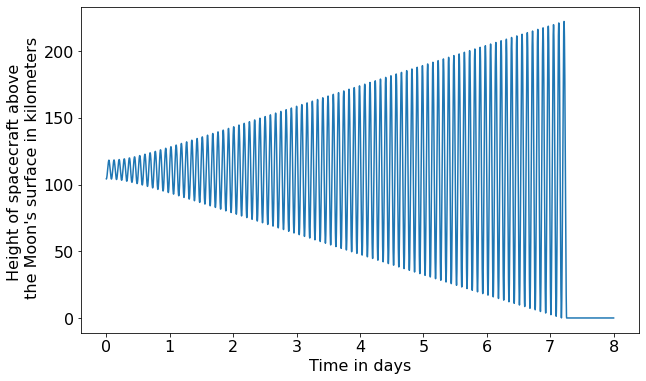

In [14]:
# This function calls the function task3b() from above to run the simulation, and it then uses the returned
# x and y positions to calculate the radial position of the satellite at each time. 
# When that radial position becomes less than or equal to the Lunar radius, the satellite has crashed, so the
# loop breaks and the height of the satellite over time is plotted.

def heightPlot(): 
    
    x_pos2,y_pos2,ts = task3b()
    heights = np.zeros(len(x_pos2))

    for i in range(0,len(x_pos2)):
        sat_radius = np.sqrt( (x_pos2[i])**2 + (y_pos2[i])**2)
        if (sat_radius > radius):
            height = sat_radius-radius
            heights[i] = height
        else:
            heights[i] = 0  #crash
            break

    plt.plot(ts/day,heights/1000)
    plt.xlabel("Time in days")
    plt.ylabel("Height of spacecraft above \n the Moon's surface in kilometers")
    plt.show()

heightPlot()

# Task 4 (10p)

Which coordinate (x or y) of the position of the spacecraft after one revolution (orbital period T from task 2) is more sensitive to small changes in the amplitude of the correction? To answer this, calculate the derivatives of dx/dq and dy/dq at t = T, for q = 0. Write your answer in the cell below, describing how you arrived at it. Place any code that demonstrates your solution in the cell with the function called `task4`.

YOUR ANSWER HERE

dx/dq at t=T for q=0 equals to -70740.8
dy/dq at t=T for q=0 equals to 32056877.1

As can be seen above, the magnitude of dy/dq is about 450 times larger than that of dx/dq,
which indicates that the y-coordinate is more sensitive to changes in the amplitude of the correction.

The graph below helps visualise this phenomenon since it shows
that y(q) changes faster as q increases from 0, compared to x(q).


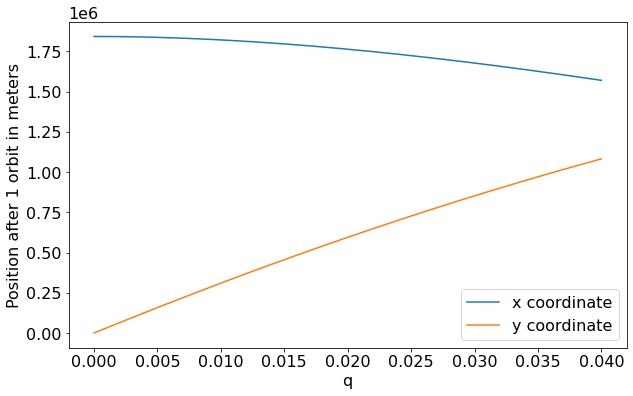

In [15]:
# The function orbit() takes the value of q as a parameter and runs the simulation up to the orbital period T_calc
# It returns the final x and y positions (i.e. at t = T_calc)

def orbit(q):
    
    ts = np.linspace(0,T_calc,int(T_calc/100))
    values = [rs[0], rs[1], vs[0], vs[1]]
    
    sol3 = integrate.odeint(funct2, values, ts, tfirst=True, args=(q,))
    
    x_pos3 = sol3[:,0]
    y_pos3 = sol3[:,1]
    
    return (x_pos3[-1], y_pos3[-1])


# The function task4() creates an array of q values and for each value of q, it calls the method orbit()
# from above to obtain the x and y positions at t = T_calc. It then uses these values to create a plot
# against the value of q, to show how each coordinate is affected.
# Finally, the function calculates the derivatives dx/dq and dy/dq at q=0, by using finite differences differentiation,
# and prints out these values for comparison reasons.

def task4():
    
    step = 0.0001
    qs = np.arange(0,0.04+step,step)
    xs = np.zeros(len(qs))
    ys = np.zeros(len(qs))
    
    for q in qs:
        idx = np.where(qs == q)[0][0]   # get the corresponding index of q in qs
        x,y = orbit(q)
        xs[idx] = x
        ys[idx] = y
    
    fig, ax = plt.subplots()
    ax.plot(qs,xs, label='x coordinate')
    ax.plot(qs,ys, label='y coordinate')
    plt.xlabel("q")
    plt.ylabel("Position after 1 orbit in meters")
    ax.legend()
    
    dx_dq = (xs[1]-xs[0])/step  #finite differences differentiation
    dy_dq = (ys[1]-ys[0])/step

    print(f"dx/dq at t=T for q=0 equals to {dx_dq:.1f}")
    print(f"dy/dq at t=T for q=0 equals to {dy_dq:.1f}")
    
    print("\nAs can be seen above, the magnitude of dy/dq is about 450 times larger than that of dx/dq,\n"
          + "which indicates that the y-coordinate is more sensitive to changes in the amplitude of the correction.")
    
    print("\nThe graph below helps visualise this phenomenon since it shows\n"
          + "that y(q) changes faster as q increases from 0, compared to x(q).")

task4()

# Task 5 (10p)

The positions of the spacecraft at t=0, t=T/2, and t=T are given in the cell below. Use them to determine the amplitude of the correction q. Note, this is a different value than for the previous tasks.

A comment for those interested in space science: this is a highly simplified and unrealistic version of the task NASA scientists had to carry out to map out the gravity at the Moon's surface using "telemetry" data (positions and velocities) of various spacecrafts orbiting the Moon.

Put your code in the cell that starts with `def task5():`.

Your answer should be within 20% of the correct answer.

In [16]:
r1 = [1842280.0, 0.0]
r2 = [-1856332.7223839264, -717.5195460640389]
r3 = [1842271.070055315, 3847.378923359429]

In [17]:
# The function interp() takes as parameters two spatial coordinates and two temporal (time) ones.
# Its purpose is to perform linear interpolation of the two points around t = T/2 so as to 
# obtain the most accurate position possible for t = T/2, and then return it.

def interp(p1,p2,t1,t2):
    
    if(t1<T_calc/2):
        
        fract = ((T_calc/2)-t1 )/ (t2-t1)  # calculate the fraction to add 
        p_mid = p1 + fract*(p2-p1)     # add it on the point before t=T/2 to obtain the exact value at t=T/2
        
    else:
        print("Wrong side of points")  
    
    return p_mid


# The function orbit2() takes as parameter a value of q runs the simulation up to t=T. It then uses the interp()
# function above to calculate an accurate position at half of the period (t = T/2).
# It finally returns 3 arrays which correspond to the calculated r1, r2 and r3.

def orbit2(q):
    
    ts = np.linspace(0,T_calc, int(T_calc/50))
    values = [rs[0], rs[1], vs[0], vs[1]]
    
    sol4 = integrate.odeint(funct2, values, ts, tfirst=True, args=(q,))
    
    x_pos4 = sol4[:,0]
    y_pos4 = sol4[:,1]
    
    mid = int(len(ts)/2)
    T_2 = ts[mid]    
    
    # the following simply set up the correct points in order for interp() to perform the accurate interpolation.
    
    if(T_2 < T_calc/2):
        x1 = x_pos4[mid] 
        y1 = y_pos4[mid] 
        x2 = x_pos4[mid+1]
        y2 = y_pos4[mid+1]
        t1 = T_2
        t2 = ts[mid+1]
        
    elif(T_2 > T_calc/2):
        x1 = x_pos4[mid-1]
        y1 = y_pos4[mid-1]
        x2 = x_pos4[mid]
        y2 = y_pos4[mid]
        t1 = ts[mid-1]
        t2 = T_2
    
    # calculated x and y positions at t=T/2
    x_mid = interp(x1,x2,t1,t2)
    y_mid = interp(y1,y2,t1,t2)
    
    my_r1 = [ x_pos4[0], y_pos4[0] ]
    my_r2 = [ x_mid, y_mid ]
    my_r3 = [ x_pos4[-1], y_pos4[-1] ]
    
    return my_r1,my_r2,my_r3


# The function similar() takes as parameters two values. It then calculates a tolerance, based on the 'orig' value,
# and it returns True if the value 'diff' is less than or equal to the calculated tolerance, False otherwise.

def similar(diff,orig):
    
    tol = np.abs(orig/100)  # tolerance is within 1% of the original value
    return (np.abs(diff)<=tol)


# The function check_rs takes as parameters the three calculated vectors (r1, r2, r3),
# and then calculated the difference between these and the original r1,r2,r3 vectors.
# It then calls the similar() function from above on all the calculated differences,
# and if all of them fall within the specified tolerance, it returns True, else it returs False.

def check_rs(my_r1,my_r2,my_r3):
    
    diff1 = np.array([ my_r1[0]-r1[0], my_r1[1]-r1[1] ])
    diff2 = np.array([ my_r2[0]-r2[0], my_r2[1]-r2[1] ])
    diff3 = np.array([ my_r3[0]-r3[0], my_r3[1]-r3[1] ])
    
    sim_x1 = similar(diff1[0],r1[0])
    sim_x2 = similar(diff2[0],r2[0])
    sim_x3 = similar(diff3[0],r3[0])
    sim_y1 = similar(diff1[1],r1[1])
    sim_y2 = similar(diff2[1],r2[1])
    sim_y3 = similar(diff3[1],r3[1])     
    
    return (sim_x1 and sim_x2 and sim_x3 and sim_y1 and sim_y2 and sim_y3) 

# The function task5() creates an array of q values, with the step and the limits calculated by trial and error.
# It then calls the orbit2() method for each q value and obtain the calculated r1,r2 and r3 positions.
# if these 3 fall close enough to the original r1,r2 and r3, the q value is stored in the 'myst_qs' list.
# Finally, the average of all the accepted q values is calculated and returned.

def task5():
    
    step = 0.0000002
    qs = np.arange(0.0001,0.0002+step,step)  
    
    myst_qs = []
    for q in qs:
        idx = np.where(qs == q)[0][0]
        my_r1,my_r2,my_r3 = orbit2(q)
        
        if(check_rs(my_r1,my_r2,my_r3)):  
            myst_qs.append(q)
           
    myst_qs2 = np.array(myst_qs)
    
    return(np.average(myst_qs2))


## Testing task 5

The cell below will run your function and print your answer. This will be tested against the correct answer (not given). Your answer should be within 20% of the correct answer.

In [18]:
t1 = time.time()
mystery_q = task5()
t2 = time.time()

print (f"q = {mystery_q}")
print (f"Solution calculated in {t2-t1} seconds.")


q = 0.00011930000000000046
Solution calculated in 2.292341709136963 seconds.


# Task 6 (15p)

What is the minimum initial height of a circular orbit such that, for the perturbation from task 3 (q = 0.00025), the spacecraft does not collide with the Moon but remains gravitationally bound to it?

The orbit may still show oscillations as in task 3, but the spacecraft cannot not hit the lunar surface.

Create a function `task6` that returns the minimum height of the circular orbit in units of meters. Explain your approach. To obtain full marks, the answer must be correct to +/-1 km.

The following formula for the velocity of a point mass in circular orbit of radius r, orbiting a spherically symmetric body of mass M, may be useful:

$
\Large
\begin{align}
v_{c} = \sqrt{\frac{G\ M}{r}}.
\end{align}
$

In the cell below, create a function that calculates the minimum height of a stable orbit in units of meters. Your answer should be within 1000 meters of the correct answer.

In [19]:
# The function orbit3() takes as parameters the duration of the simulation and a value to add on the initial x position.
# It then uses the equation above to calculate the initial velocity based on that initial position (r=x since y=0 initially)
# Next, it loops through the positions to calculate the radial position, and checks if the spacecraft has crashed during 
# each specific simulation. It finally returns the crash time of the spacecraft (infinity if it never crashed).

def orbit3(duration, add):
    
    q = 0.00025
    ts = np.linspace(0,duration,int(duration/1000))
    r_init = rs[0]+add
    v_init = np.sqrt(gg * mass / r_init)
    print(f"Initial velocity: {v_init:.2f} m/s")
    values = [r_init, 0, 0, v_init]
    
    sol3 = integrate.odeint(funct2, values, ts, tfirst=True, args=(q,))
    
    x_pos3 = sol3[:,0]
    y_pos3 = sol3[:,1]
    
    for i in range(0,len(x_pos3)):
        sat_radius = np.sqrt( (x_pos3[i])**2 + (y_pos3[i])**2)
        
        if (sat_radius <= radius):
            crash_time = ts[i]
            break
        else:
            crash_time = np.inf   # did not crash in this simulation
    
    if(crash_time == np.inf):     # only plot the trajectory where the spacecraft did not crash
        heights_plot(x_pos3,y_pos3,ts)
    
    return crash_time

# The function heights_plot() takes as parameters three arrays corresponding to the x and y positions, and the t values.
# It then uses these values to plot the radial position of the spacecraft (height over the Lunar surface) over time.

def heights_plot(x_pos3,y_pos3,ts):
    
    heights = np.zeros(len(x_pos3))

    for i in range(0,len(x_pos3)):
        sat_radius = np.sqrt( (x_pos3[i])**2 + (y_pos3[i])**2)
        if (sat_radius >= radius):
            height = sat_radius-radius
            heights[i] = height
        else:
            heights[i] = 0  #crash
            break
    
    plt.plot(ts/day,heights)
    plt.title("Height of spacecraft over time. Oscillatory motion (the big 'envelope')"+ 
              "\ncan be clearly identified, which indicates that the spacecraft does not crash.")
    plt.xlabel("Time in days")
    plt.ylabel("Height of spacecraft above \n the Moon's surface in meters")
    plt.show()


In [20]:
# The function task6() runs the simulation multiple times, each time changing the initial height by the 'add' variable.
# If the spacecraft has crashed in the simulation, the initial height is increased by a set increment.

# Initially, I started with add=0 and my increment was +1km, and if the spacecraft did not crash within the given duration, 
# I increased it by 1 year to see if it will crash then, and so on.
# But this resulted in long computational times and I will explain below why I accepted the first value that
# did not crash within my 50 day duration. (I will submit a screenshot of the plot I produced)
# The function finally returns the minimum initial height which produced a stable (but oscillatory) orbit.

def task6():
    
    duration = 50*day 
    
    # any value smaller than this results in crash within 50 days (determined by trial and error)
    # thus I will use this value as a 'base', with a small increment for an accurate result
    add = 50000    
    
    while(True):
        print(f"\nInitial height in km now is {rs[0] + add - radius}")
        simul = orbit3(duration, add)
        
        if(simul != np.inf):
            days = simul/day
            print(f"Crashed in {days:2f} days")
            add += 100           # small increment for an accurate result
        else:
            print("Never crashed within the simulation duration\n")
            duration += (365*day)
    
        if(add > 51000 or duration> 365*day):   # the exit criterion
            min_height = rs[0] + add - radius
            
            img = mpimg.imread('task6_errors.png')  # the plot I produced during 'experimenting'
            imgplot = plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
            plt.title("A plot of 1/crash time against the initial height of the spacecraft.")
            plt.show()
            print("\nAt the plot above, the point where the spacecraft no longer crashes and "+
                  "enters an oscillatory periodic motion,\ncan clearly be identified by that sudden drop. "+
                  "Despite that, if the simulation is run for more time (2+ years),\nthat orbit also eventually crashes, "+
                 "but I will assume that this is because of numerical errors being carried forward\nplus the fact " +
                 "that my solver probably does not conserve energy over these long timescales, due to its numerical nature.\n")
            
            return min_height

## Testing task 6

The cell below will run your function and print your answer. This will be tested against the correct answer (not given). Your answer should be within 1000 meters of the correct answer.


Initial height in km now is 154280
Initial velocity: 1609.20 m/s
Crashed in 16.763140 days

Initial height in km now is 154380
Initial velocity: 1609.16 m/s
Crashed in 16.763140 days

Initial height in km now is 154480
Initial velocity: 1609.12 m/s
Crashed in 16.936791 days

Initial height in km now is 154580
Initial velocity: 1609.07 m/s


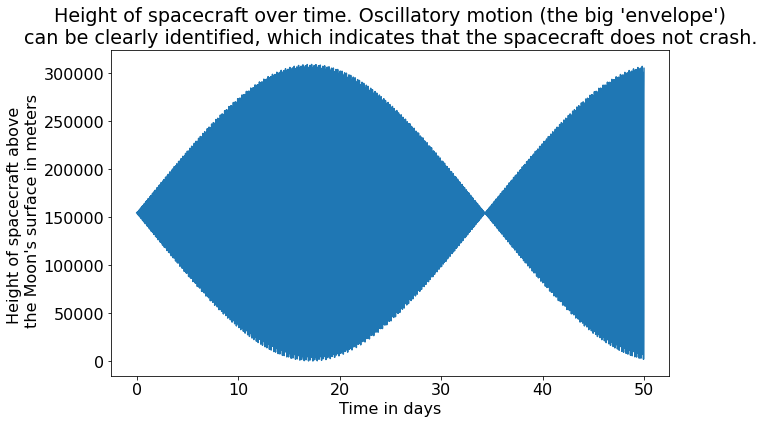

Never crashed within the simulation duration



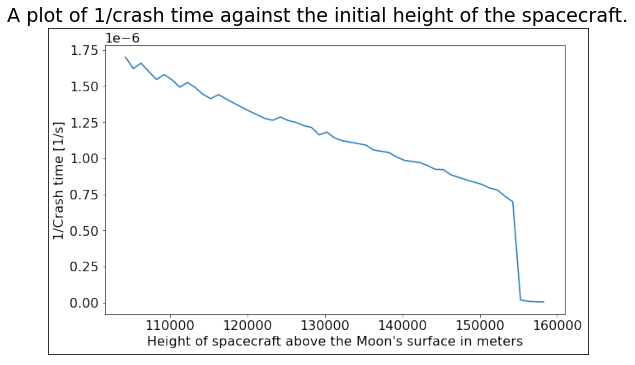


At the plot above, the point where the spacecraft no longer crashes and enters an oscillatory periodic motion,
can clearly be identified by that sudden drop. Despite that, if the simulation is run for more time (2+ years),
that orbit also eventually crashes, but I will assume that this is because of numerical errors being carried forward
plus the fact that my solver probably does not conserve energy over these long timescales, due to its numerical nature.

Minimum height of stable orbit: 154580 m.
Solution calculated in 7.916752338409424 seconds.


In [21]:
t1 = time.time()
min_height = task6()
t2 = time.time()
print (f"Minimum height of stable orbit: {min_height} m.")
print (f"Solution calculated in {t2-t1} seconds.")
